### 1. IMPORTING NECESSARY LIBRARIES

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

### 2. IMPORTING THE DATASET

In [2]:
Columns=['target','ID','date','flag','user','tweet']
Encoding = "ISO-8859-1"
df = pd.read_csv('D:\Projects\Sentiment Analysis\SA_DATA.csv', encoding=Encoding, names=Columns)
df.shape

(1600000, 6)

### 3. EXPLORATORY DATA ANALYSIS

In [3]:
df.head()

,target,ID,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
data=df[['tweet','target']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   tweet   1600000 non-null  object
 1   target  1600000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


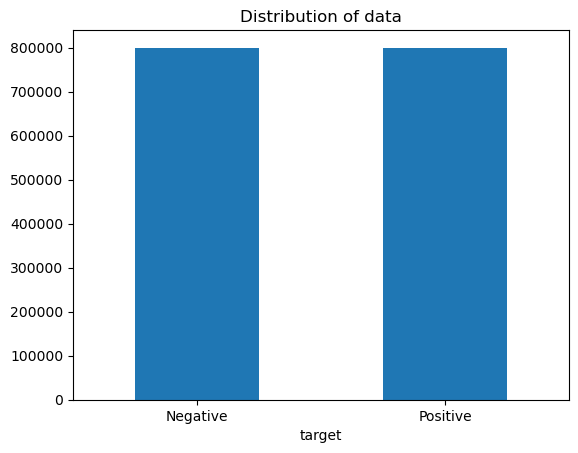

In [5]:
ax = data.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
tweet, target = list(data['tweet']), list(data['target'])

### 4. DATA PRE-PROCESSING

In [6]:
data['target'] = data['target'].replace(4,1)
data['target'].unique()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6844\3152207588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


array([0, 1], dtype=int64)

In [7]:
positive_count = data['target'].value_counts()[0]
negative_count = data['target'].value_counts()[1]
print(f"Number of negative tweets (0): {negative_count}")
print(f"Number of positive tweets (1): {positive_count}")

Number of negative tweets (0): 800000
Number of positive tweets (1): 800000


In [8]:
negative_tweets = data[data['target'] == 0].sample(n=50000, random_state=42)
positive_tweets = data[data['target'] == 1].sample(n=50000, random_state=42)

data = pd.concat([negative_tweets, positive_tweets])

data = data.sample(frac=1, random_state=42).reset_index(drop=True)

print(data['target'].value_counts())

1    50000
0    50000
Name: target, dtype: int64


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   tweet   100000 non-null  object
 1   target  100000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


### 4.1 REMOVING STOPWORDS

In [10]:
data['tweet']=data['tweet'].str.lower()
data['tweet'].head()
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

STOPWORDS = set(stopwordlist)

def cleaning_stopwords(tweet):
    return " ".join([word for word in str(tweet).split() if word not in STOPWORDS])
data['tweet'] = data['tweet'].apply(lambda tweet: cleaning_stopwords(tweet))
data['tweet'].head()

0                          @stargazer60 that's awesome
1                          @cunningstunts22 yes... am!
2                                  n bed aaallll alone
3    @thorney88 guinea fowl ive heard lots people d...
4                              def going movies tonite
Name: tweet, dtype: object

### 4.2 REMOVING PUNCTUATIONS, REPEATING CHARACTERS, URLs, NUMBERS

In [11]:
import string
import re

def clean_punctuations(tweet):
    punctuations_list = string.punctuation
    translator = str.maketrans('', '', punctuations_list)
    return tweet.translate(translator)

def clean_repeating_chars(tweet):
    return re.sub(r'(.)\1+', r'\1', tweet)

def clean_urls(tweet):
    return re.sub(r'((www.[^\s]+)|(https?://[^\s]+))', ' ', tweet)

def clean_numbers(tweet):
    return re.sub(r'[0-9]+', '', tweet)

data['tweet'] = data['tweet'].apply(clean_punctuations)
data['tweet'] = data['tweet'].apply(clean_repeating_chars)
data['tweet'] = data['tweet'].apply(clean_urls)
data['tweet'] = data['tweet'].apply(clean_numbers)

data['tweet'].head()

0                              stargazer thats awesome
1                                  cuningstunts yes am
2                                       n bed al alone
3    thorney guinea fowl ive heard lots people disl...
4                              def going movies tonite
Name: tweet, dtype: object

### 4.3 PERFORMING STEMMING AND LEMMETIZATION

In [12]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

data['tweet'] = data['tweet'].apply(lambda x: word_tokenize(x))

porter_stemmer = PorterStemmer()
data['tweet'] = data['tweet'].apply(lambda x: [porter_stemmer.stem(word) for word in x])

wordnet_lemmatizer = WordNetLemmatizer()
data['tweet'] = data['tweet'].apply(lambda x: [wordnet_lemmatizer.lemmatize(word) for word in x])

data['tweet'].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0                              [stargaz, that, awesom]
1                                [cuningstunt, ye, am]
2                                   [n, bed, al, alon]
3    [thorney, guinea, fowl, ive, heard, lot, peopl...
4                               [def, go, movi, tonit]
Name: tweet, dtype: object

### 4.4 PERFORMING TRAIN-TEST SPLIT

In [13]:
data['tweet_str'] = data['tweet'].apply(lambda x: ' '.join(x))
X_train, X_test, y_train, y_test = train_test_split(data['tweet_str'], data['target'], test_size=0.05, random_state=42)

### 4.5 PERFORMING VECTORIZATION

In [14]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=500000)
vectorizer.fit(X_train)
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

### MODEL IMPLEMENTATION 

### 5.1 LOGISTIC REGRESSION

In [15]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_vec, y_train)
y_pred_lr = logistic_regression.predict(X_test_vec)
print ("Testing accuracy of the Logistic Regression model is: ", accuracy_score(y_test, y_pred_lr))

Testing accuracy of the Logistic Regression model is:  0.7898


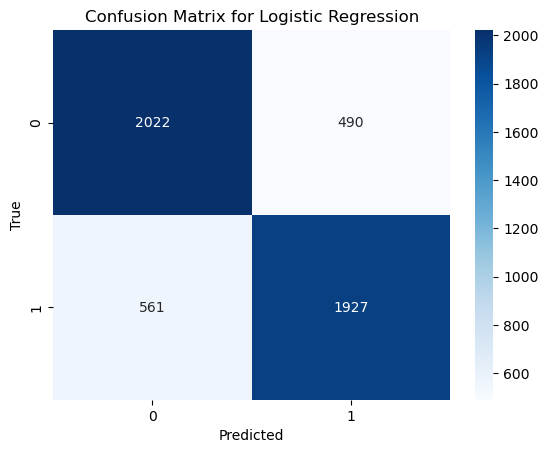

In [16]:
matrix_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(matrix_lr, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

### 5.2 KNN

In [17]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_vec, y_train)
y_pred_knn = knn_classifier.predict(X_test_vec)
print ("Testing accuracy of the KNN model is: ", accuracy_score(y_test, y_pred_knn))

Testing accuracy of the KNN model is:  0.5386


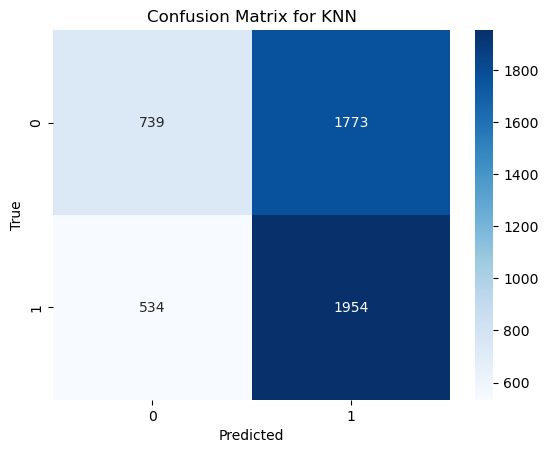

In [18]:
matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(matrix_knn, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for KNN")
plt.show()

### 5.3 NAIVE BAYES

In [19]:
naivebayes = MultinomialNB()
naivebayes.fit(X_train_vec, y_train)
y_pred_nb = naivebayes.predict(X_test_vec)
print ("Testing accuracy of the Naive Bayes model is: ", accuracy_score(y_test, y_pred_nb))

Testing accuracy of the Naive Bayes model is:  0.7718


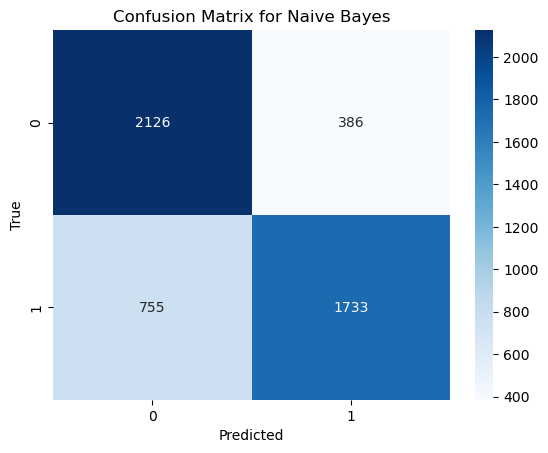

In [20]:
matrix_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(matrix_nb, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Naive Bayes")
plt.show()

### 5.4 RANDOM FOREST

In [21]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_vec, y_train)
y_pred_rf = model_rf.predict(X_test_vec)
print ("Testing accuracy of the Random Forest model is: ", accuracy_score(y_test, y_pred_rf))

Testing accuracy of the Random Forest model is:  0.7792


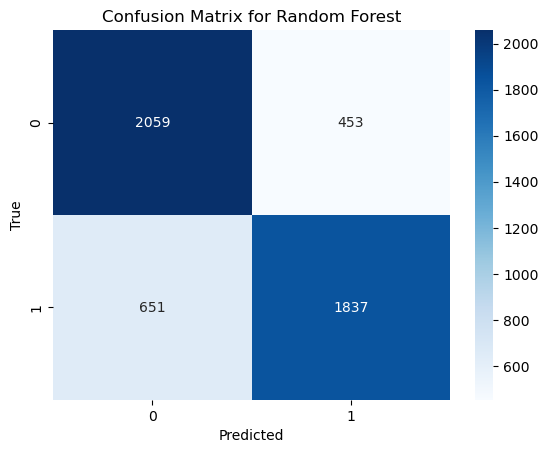

In [22]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Random Forest")
plt.show()

### 5.5 SUPPORT VECTOR MACHINE

In [23]:
model_svm = SVC(kernel='linear', C=1)
model_svm.fit(X_train_vec, y_train)
y_pred_svm = model_svm.predict(X_test_vec)
print ("Testing accuracy of the Support Vector Machine model is: ", accuracy_score(y_test, y_pred_svm))

Testing accuracy of the Support Vector Machine model is:  0.7972


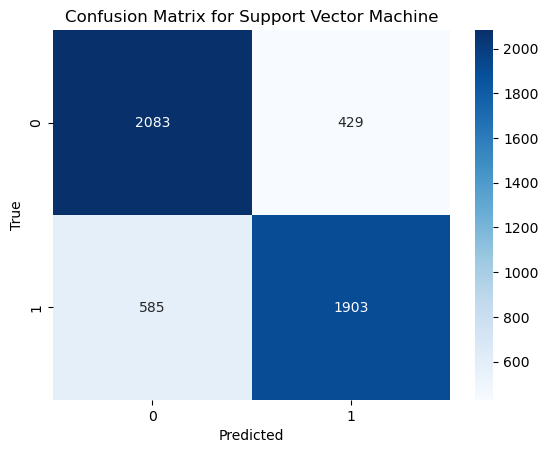

In [24]:
matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(matrix_svm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Support Vector Machine")
plt.show()